# Currency Ising Model Visualisations

### Import Libraries

In [1]:
# Import necessary libraries for data handling and visualisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

# Set up the visualisation settings for seaborn
sns.set_theme(style="whitegrid")

### Load Optimised Parameters

##### Define the file paths for the optimised J matrix and h vector

In [2]:
def load_J_and_h(J_file_path, h_file_path):
    # Load the J matrix from the csv file
    J_df = pd.read_csv(J_file_path)

    # Extract currency symbols from the DataFrame
    symbols = J_df.columns.tolist()
    symbols = [col[:3] if len(col) == 6 else col for col in symbols]

    # Convert the DataFrame to a numpy array
    J = J_df.values

    # Load the h vector from the csv file
    h = pd.read_csv(h_file_path, header=None)[1].values

    # Confirm the shapes of the loaded J matrix and h vector
    print(f"Shape of J matrix: {J.shape}")
    print(f"Length of h vector: {len(h)}")

    return J, h, symbols

J, h, symbols = load_J_and_h('Results/J.csv', 'Results/h.csv')
J_extended, h_extended, symbols_extended = load_J_and_h('Results/J_opt_extended.csv', 'Results/h_opt_extended.csv')

Shape of J matrix: (26, 26)
Length of h vector: 26
Shape of J matrix: (27, 27)
Length of h vector: 27


### Function to Add Title and Subtitle

In [3]:
# Define a function to add a title and a subtitle to a matplotlib figure
def add_title_and_subtitle(title, subtitle, title_space=1.04, subtitle_space=1.01):
    """
    Add a main title and a subtitle to a matplotlib figure.

    Parameters:
    title (str): The main title text.
    subtitle (str): The subtitle text.
    title_space (float): The space above the title. Default is 1.06.
    subtitle_space (float): The space for the subtitle just below the title. Default is 1.03.
    """
    plt.title(title, y=title_space, fontsize=18)  # Add the main title with space adjustment
    plt.text(x=0.5, y=subtitle_space, s=subtitle, fontsize=14,
             ha='center', va='bottom', transform=plt.gca().transAxes)  # Add the subtitle

### Plot Heatmap of J Matrix

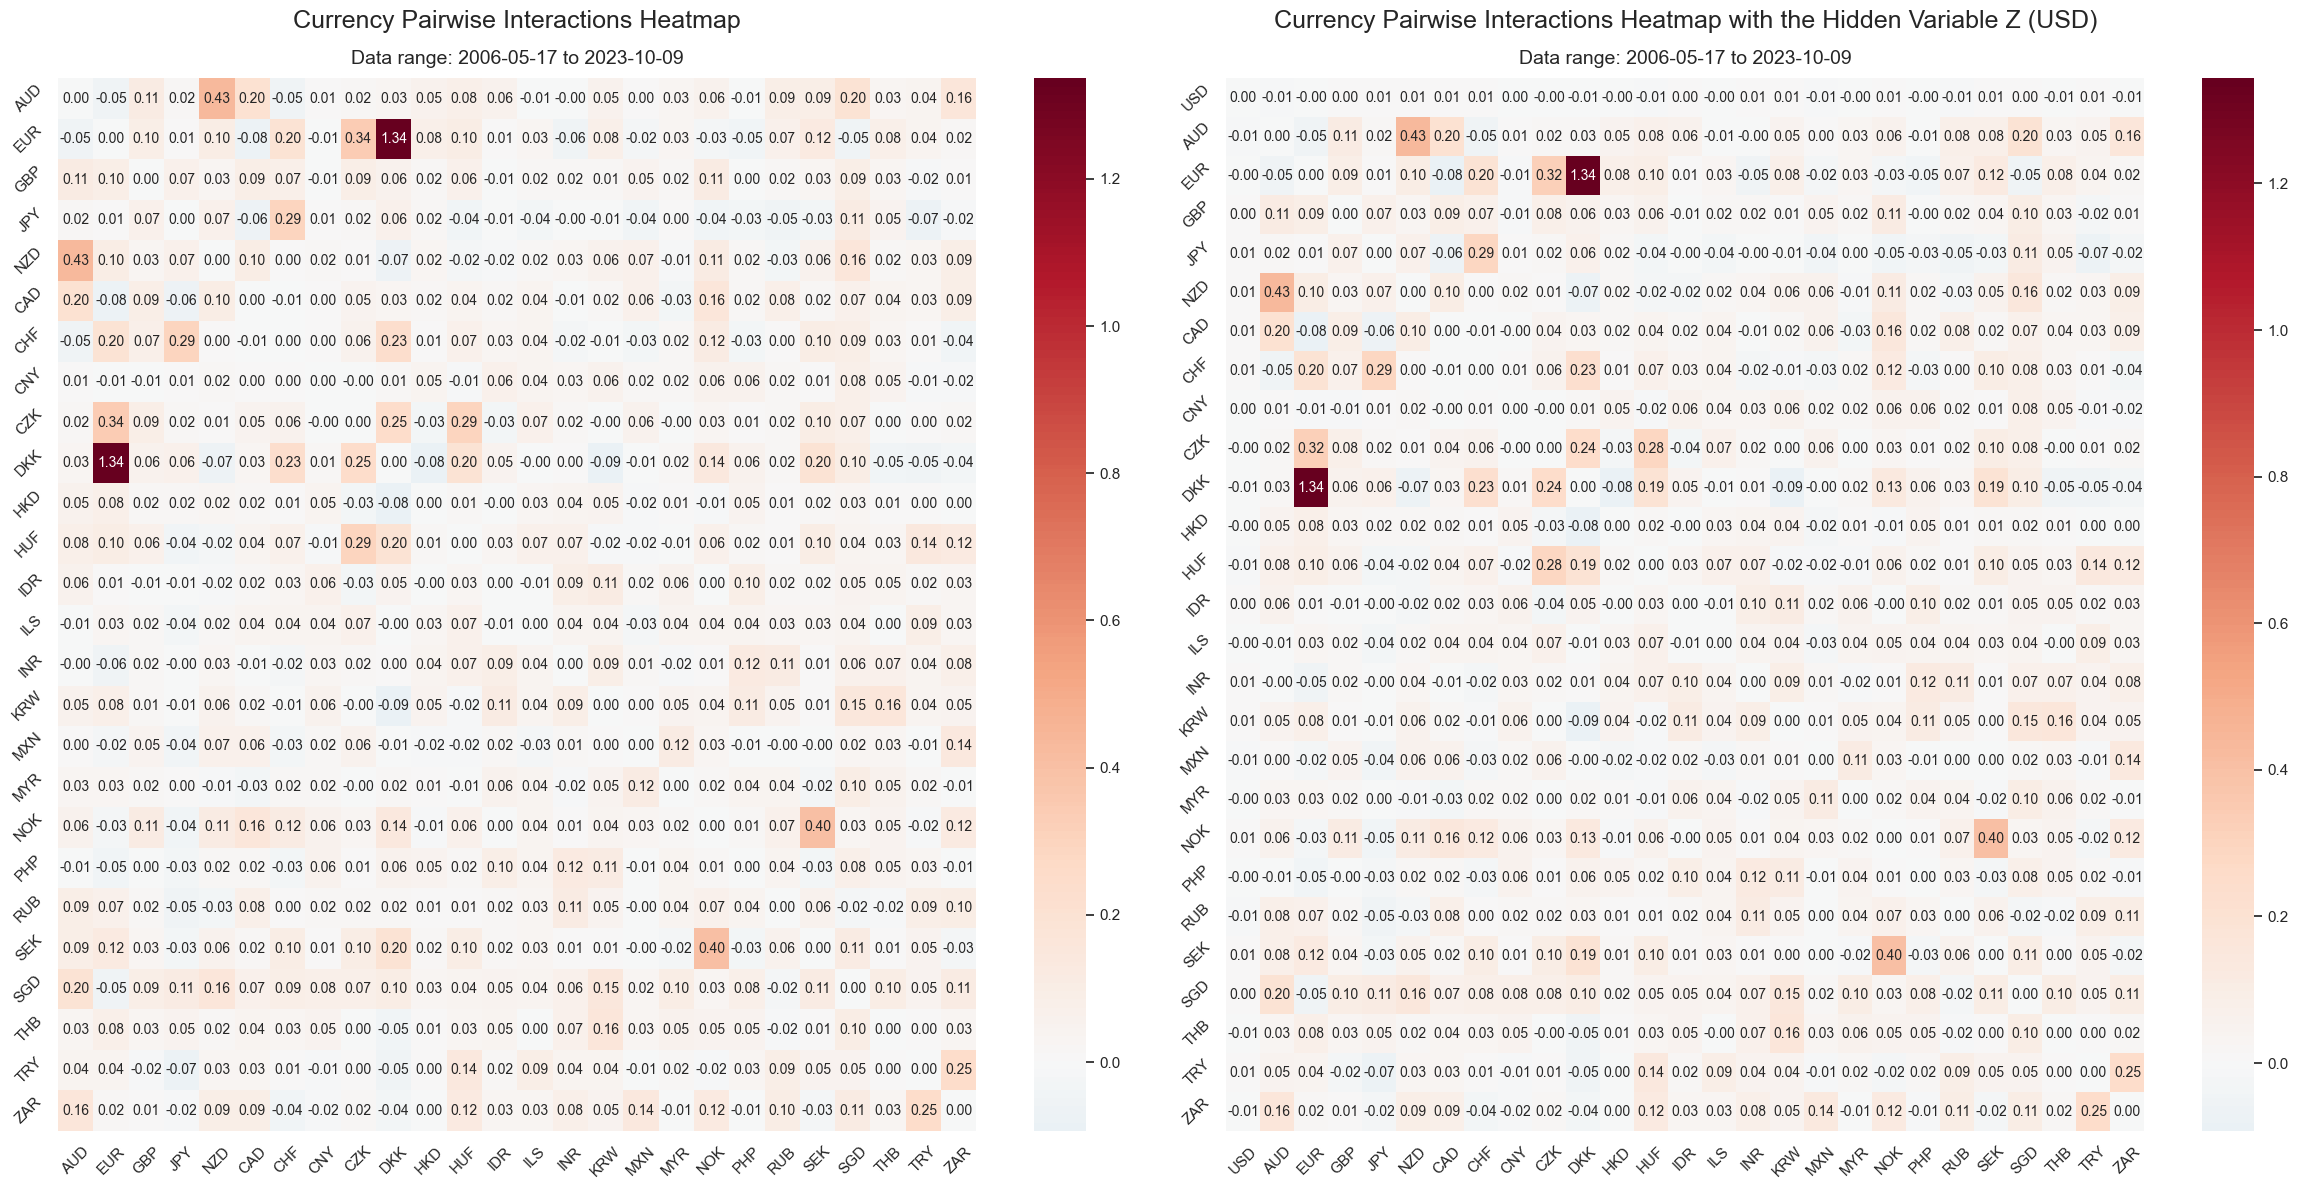

In [4]:
# Define a function to visualise the J matrix as a heatmap
def plot_heatmap(title, title_extended, subtitle):
    """
    Create a heatmap visualisation of the interaction matrix J.
    """
    # Plotting heatmaps for optimised parameters
    plt.figure(figsize=(24, 12))

    # heatmap plot for J
    plt.subplot(1, 2, 1)
    sns.heatmap(J, annot=True, fmt='.2f', annot_kws={"size": 10}, cmap='RdBu_r', center=0,
                xticklabels=symbols, yticklabels=symbols)  # Create the heatmap with annotations
    plt.xticks(rotation=45)  # Rotate x labels for better fit
    plt.yticks(rotation=45)  # Rotate y labels for better fit
    add_title_and_subtitle(title, subtitle)  # Add title and subtitle

    # heatmap plot for J_extended
    plt.subplot(1, 2, 2)
    sns.heatmap(J_extended, annot=True, fmt='.2f', annot_kws={"size": 10}, cmap='RdBu_r', center=0,
                xticklabels=symbols_extended, yticklabels=symbols_extended)  # Create the heatmap with annotations
    plt.xticks(rotation=45)  # Rotate x labels for better fit
    plt.yticks(rotation=45)  # Rotate y labels for better fit
    add_title_and_subtitle(title_extended, subtitle)  # Add title and subtitle

    # Display the heatmap
    plt.tight_layout()
    plt.show()

# Visualise the optimised J matrix using the defined function
plot_heatmap("Currency Pairwise Interactions Heatmap", "Currency Pairwise Interactions Heatmap with the Hidden Variable Z (USD)", "Data range: 2006-05-17 to 2023-10-09")

### Plot Bar Chart of h Vector

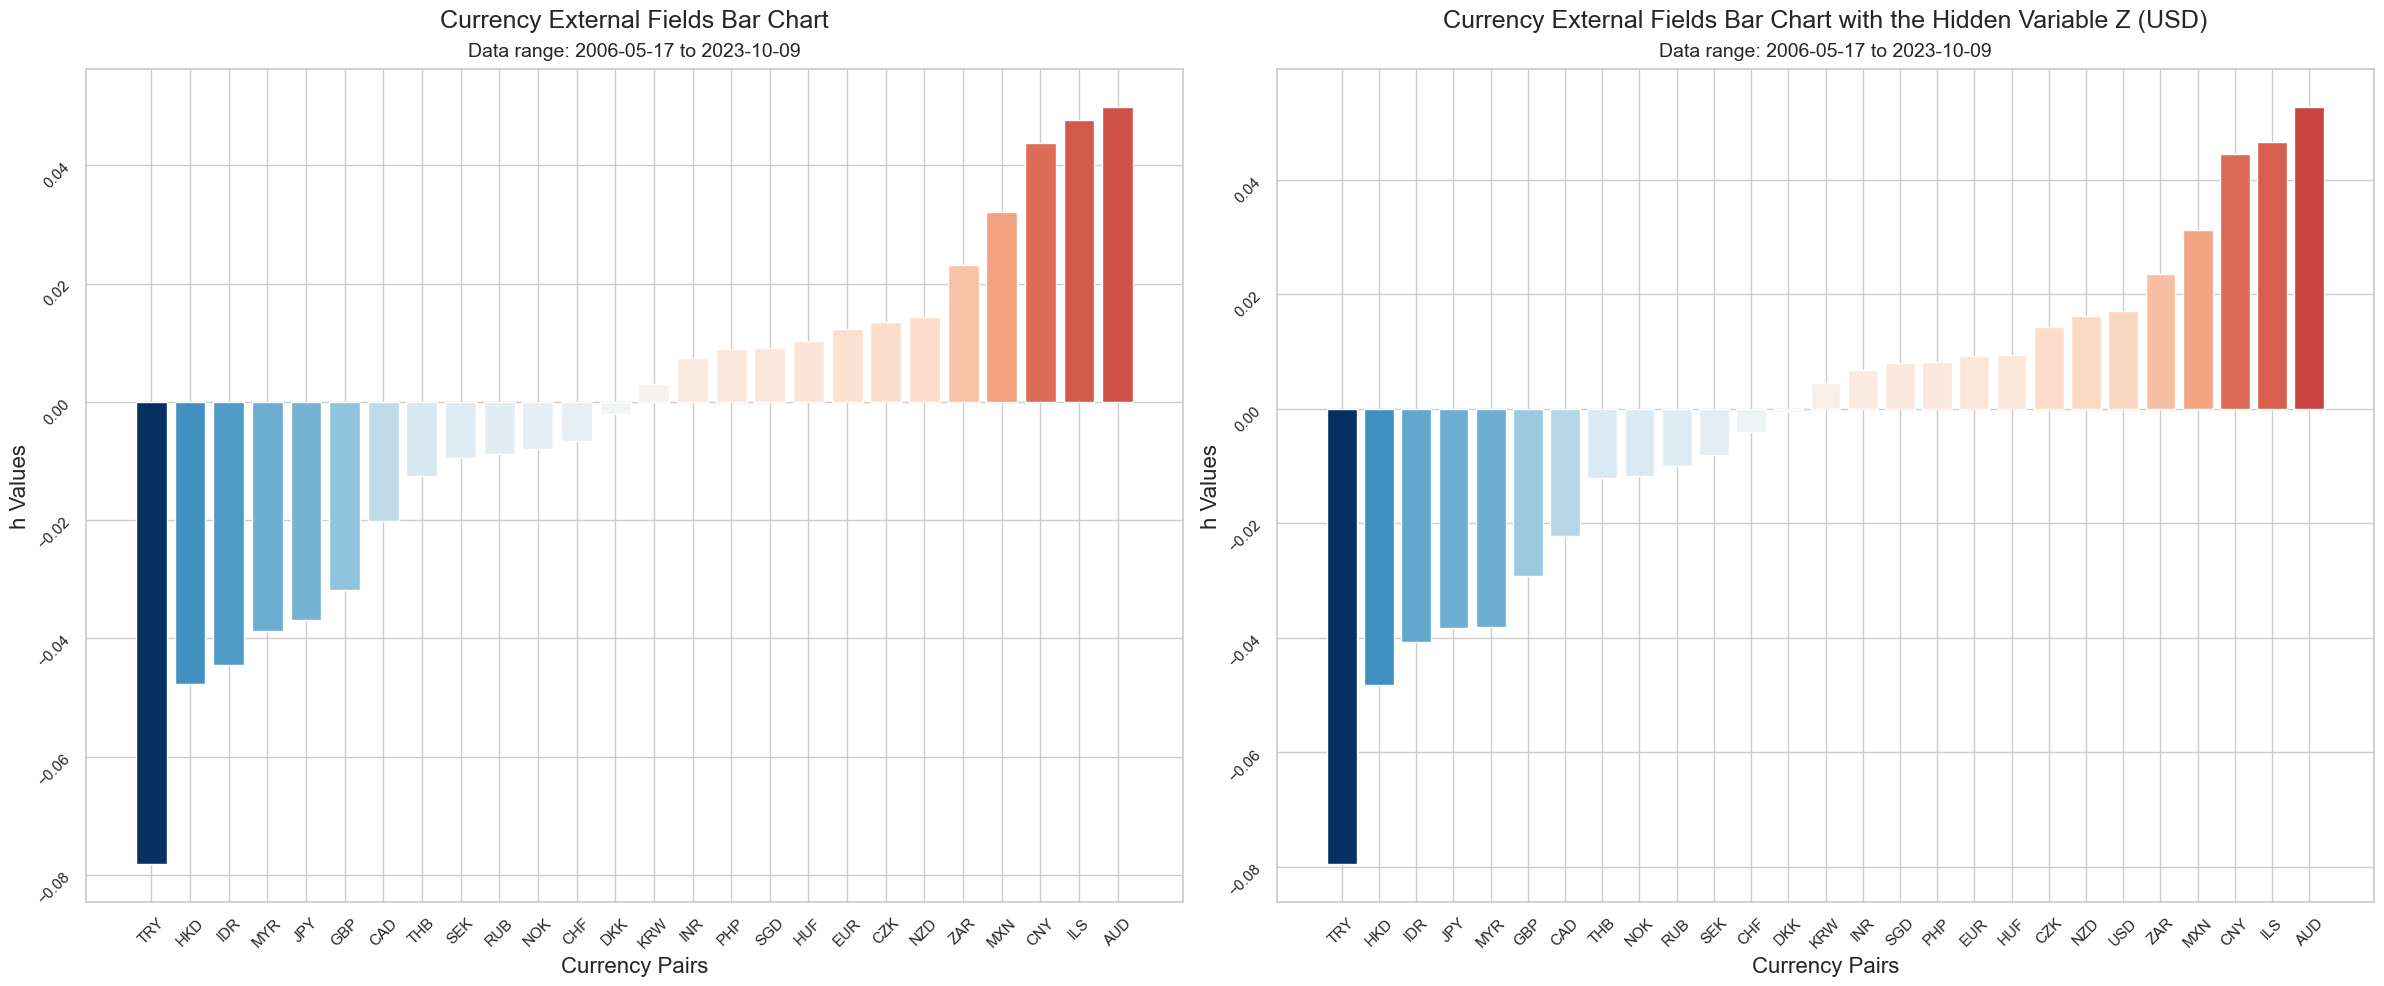

In [5]:
import matplotlib.cm as cm

# Define a function to visualise the h vector as a bar heatmap
def plot_external_field_barchart(title, title_extended, subtitle):
    """
    Create a bar chart visualisation of the external field vector h.
    """

    # Set the figure size for better visibility
    plt.figure(figsize=(24, 10))

    # Normalize h values to the range [0, 1] for color mapping
    norm = plt.Normalize(min(h), -min(h))
    # Create a color map
    cmap = cm.ScalarMappable(norm=norm, cmap='RdBu_r')

    # Sort the h values and corresponding labels
    sorted_indices = np.argsort(h)
    h_sorted = h[sorted_indices]
    labels_sorted = np.array(symbols)[sorted_indices]

    # Plot bar chart for h
    plt.subplot(1, 2, 1)
    # Create a barplot with sorted labels and h values
    for i, value in enumerate(h_sorted):
        color = cmap.to_rgba(value)
        plt.bar(labels_sorted[i], value, color=color)

    # Set the title and axis labels
    plt.xlabel("Currency Pairs", fontsize=16)
    plt.ylabel("h Values", fontsize=16)
    plt.xticks(rotation=45)  # Rotate x labels for better fit
    plt.yticks(rotation=45)  # Rotate y labels for better fit
    add_title_and_subtitle(title, subtitle)

    # Sort the h values and corresponding labels
    sorted_indices_extended = np.argsort(h_extended)
    h_extended_sorted = h_extended[sorted_indices_extended]
    labels_extended_sorted = np.array(symbols_extended)[sorted_indices_extended]

    # Plot bar chart for h
    plt.subplot(1, 2, 2)
    # Create a barplot with sorted labels and h values
    for i, value in enumerate(h_extended_sorted):
        color = cmap.to_rgba(value)
        plt.bar(labels_extended_sorted[i], value, color=color)

    # Set the title and axis labels
    plt.xlabel("Currency Pairs", fontsize=16)
    plt.ylabel("h Values", fontsize=16)
    plt.xticks(rotation=45)  # Rotate x labels for better fit
    plt.yticks(rotation=45)  # Rotate y labels for better fit
    add_title_and_subtitle(title_extended, subtitle)

    # Show the bar plot
    plt.tight_layout()
    plt.show()

# Visualise the optimised h vector using the defined function
plot_external_field_barchart("Currency External Fields Bar Chart", "Currency External Fields Bar Chart with the Hidden Variable Z (USD)", "Data range: 2006-05-17 to 2023-10-09")

### Plot Histograms of J and h

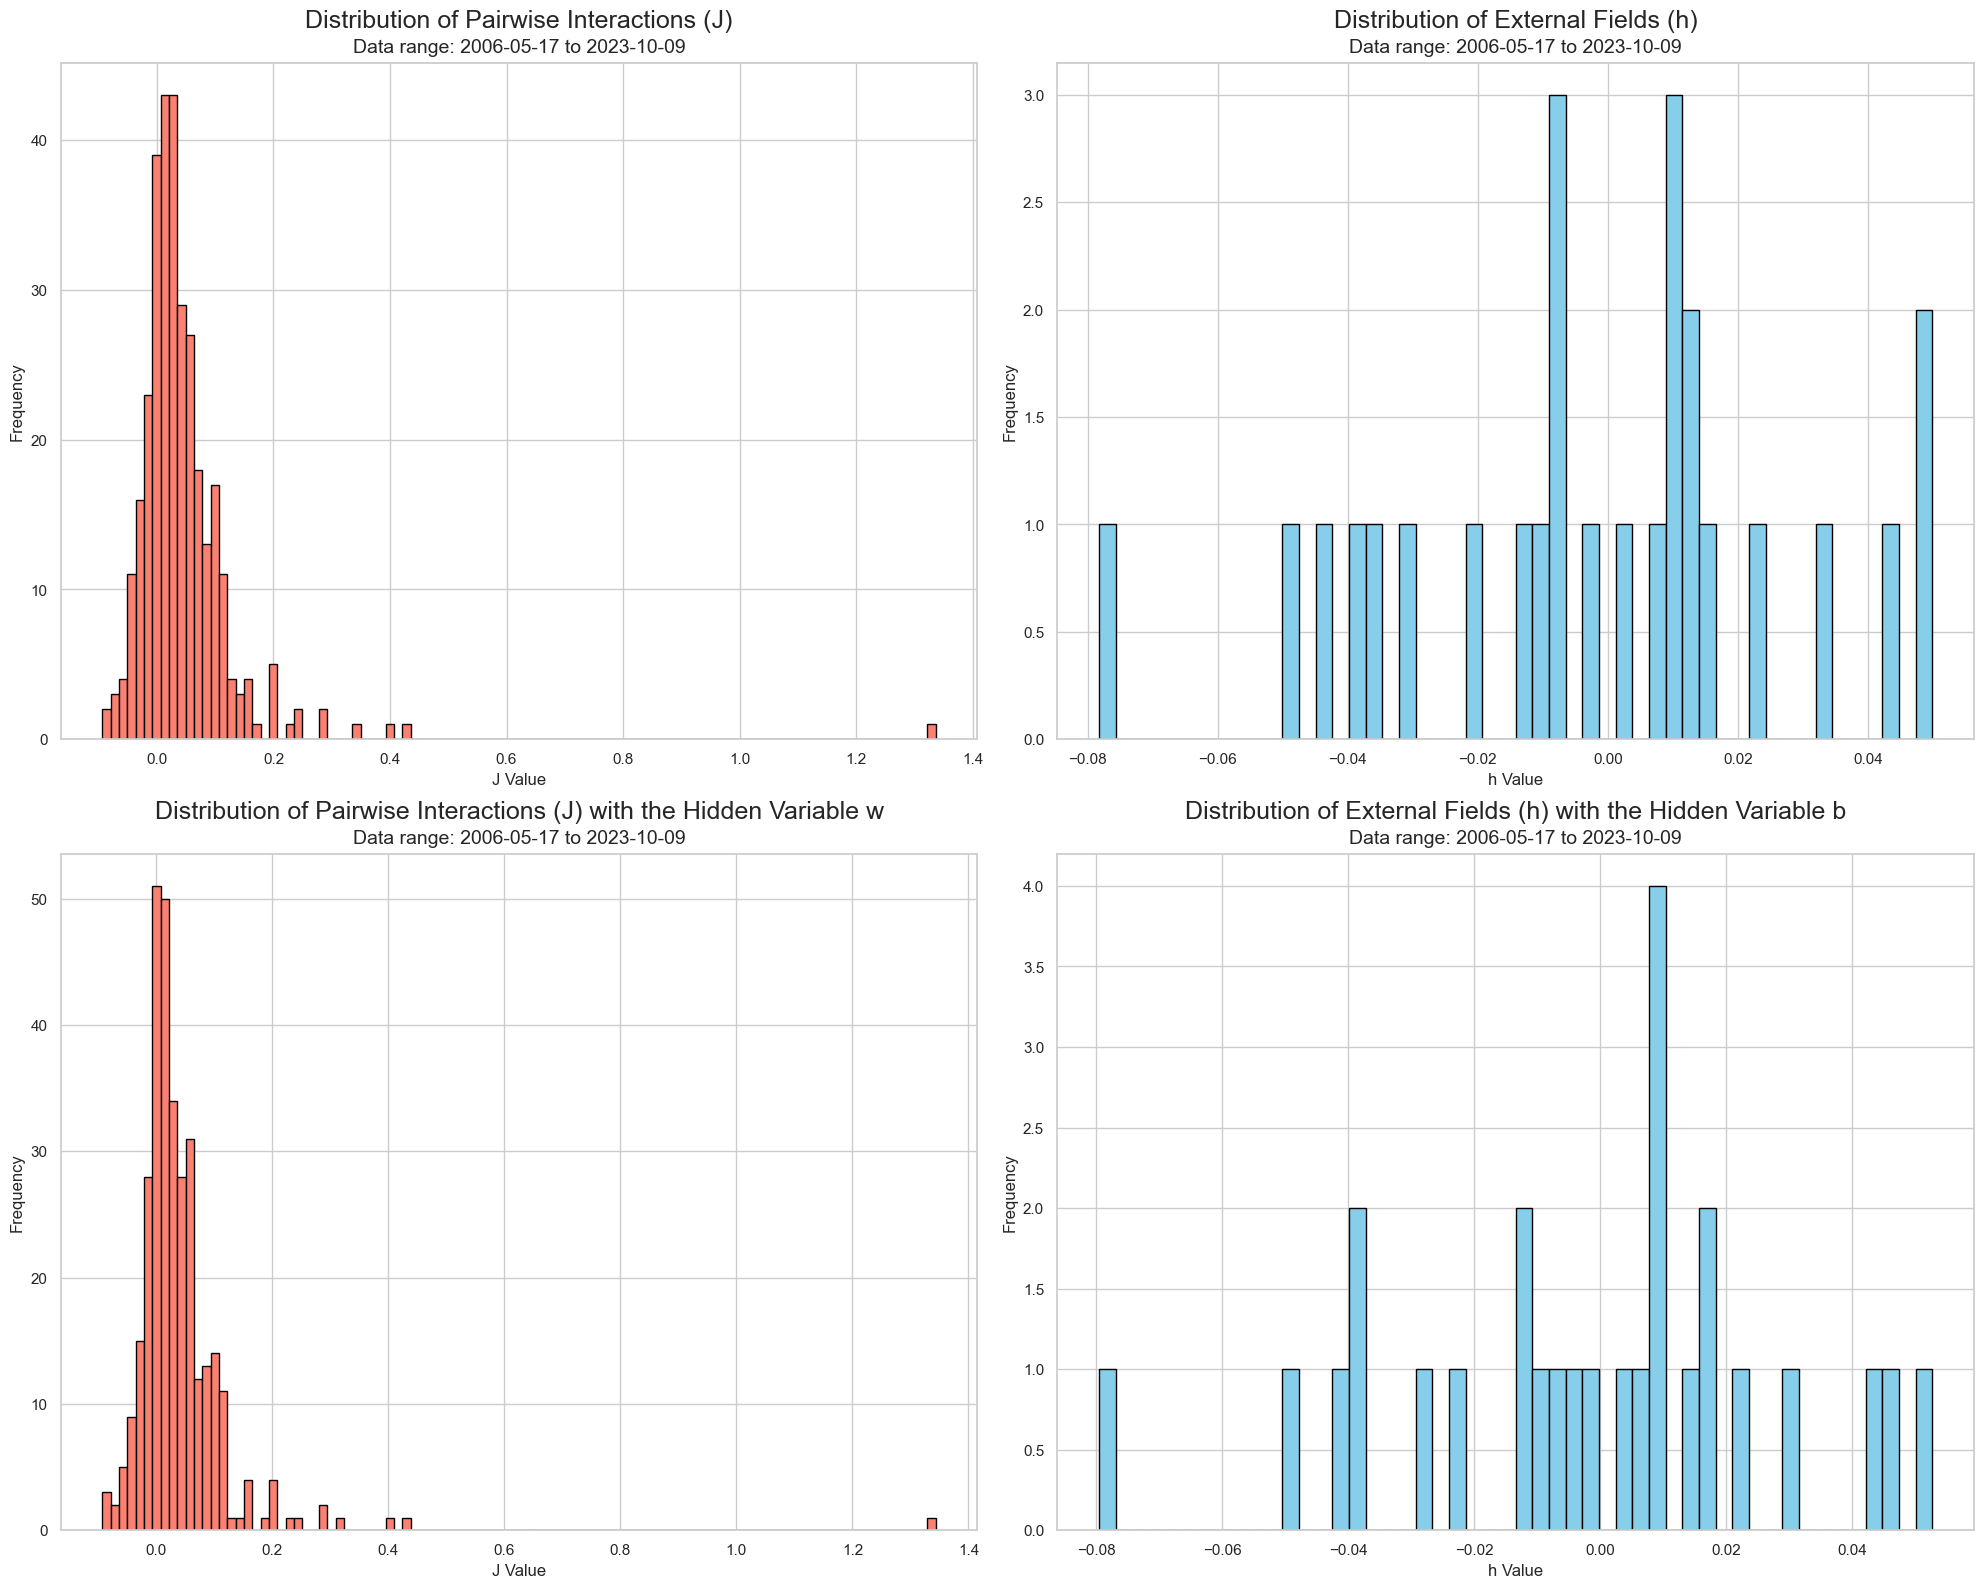

In [6]:
# Define a function to plot histograms for the J matrix and h vector
def plot_histograms(subtitle):
    """
    Plot histograms for the pairwise interactions (J matrix) and external fields (h vector).
    """
    # Plotting scatter plots for optimised parameters
    plt.figure(figsize=(20, 16))

    # Extract upper triangular elements of J
    J_values = J[np.triu_indices_from(J, k=1)]
    plt.subplot(2, 2, 1)
    plt.hist(J_values, bins=100, color='salmon', edgecolor='black')
    add_title_and_subtitle('Distribution of Pairwise Interactions (J)', subtitle)  # Add title and subtitle
    plt.xlabel('J Value')
    plt.ylabel('Frequency')

    plt.subplot(2, 2, 2)
    plt.hist(h, bins=50, color='skyblue', edgecolor='black')
    add_title_and_subtitle('Distribution of External Fields (h)', subtitle)  # Add title and subtitle
    plt.xlabel('h Value')
    plt.ylabel('Frequency')

    # Extract upper triangular elements of J
    J_extended_values = J_extended[np.triu_indices_from(J, k=1)]
    plt.subplot(2, 2, 3)
    plt.hist(J_extended_values, bins=100, color='salmon', edgecolor='black')
    add_title_and_subtitle('Distribution of Pairwise Interactions (J) with the Hidden Variable w', subtitle)  # Add title and subtitle
    plt.xlabel('J Value')
    plt.ylabel('Frequency')

    plt.subplot(2, 2, 4)
    plt.hist(h_extended, bins=50, color='skyblue', edgecolor='black')
    add_title_and_subtitle('Distribution of External Fields (h) with the Hidden Variable b', subtitle)  # Add title and subtitle
    plt.xlabel('h Value')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Visualise the distributions of J and h
plot_histograms("Data range: 2006-05-17 to 2023-10-09")

In [ ]:
# Load the currency data from an csv file into a pandas DataFrame
df = pd.read_csv("Results/data_matrix.csv")

# Extract column names from the DataFrame excluding any non-currency columns like 'Date'
symbols = df.columns.tolist()[1:]

# Calculate the correlation matrix
correlation_matrix = df.drop(columns='Date').corr()

# Visualise the correlation matrix using the defined function
plot_heatmap(correlation_matrix, symbols, "Currency Correlation Matrix Heatmap", "Data range: 2006-05-17 to 2023-10-09")